In [2]:
%matplotlib inline

import numpy as np

from matplotlib import pyplot as plt
from math import log
from math import sqrt
import seaborn as sns
from copy import copy


plt.style.use('seaborn-poster')
sns.set()

In [3]:
def single_coin():
    fig, ax = plt.subplots(figsize=(10, 6))

    # Plot a scatter that persists (isn't redrawn) and the initial line.
    indices = np.arange(0, K) + 1
    x = np.random.binomial(1, 0.5 + p, K) * 2 - 1
    dots = ax.scatter(indices, x, label="Single coin flip")

    accum_x = np.array([0] + np.cumsum(x).tolist())
    indices = np.arange(0, K + 1)
    ax.plot(indices, accum_x, 'r-', label="Sum of coin flips")
    MAX = max(np.max(accum_x), -np.min(accum_x))

    # Set styles
    ax.set_xlabel("$n$", fontsize=26)
    ax.set_ylabel("$S_n$", fontsize=26)
    ax.set_xlim(0, K + 1)
    ax.set_ylim(-MAX * 1.05, MAX * 1.05)
    ax.grid(True, axis="both", which="both")
    ax.legend()

def multiple_coins(ax, N, K, p, label, x=None):
    if x is None:
        x = [
            (np.random.binomial(1, p, K) * 2 - 1)
            for i in range(N)
        ]
    accum_x = np.concatenate(([[0] for k in range(N)], np.cumsum(x, axis=1)), axis=1)
    indices = np.arange(0, K + 1)
    for i in range(N):
        # i-th line
        ax.plot(indices, accum_x[i], linewidth=1.0, label=label)

    # Set styles
    ax.set_xlabel("$n$", fontsize=26)
    ax.set_ylabel("$S_n$", fontsize=26)
    ax.grid(True, axis="both", which="both")
    if label:
        ax.legend()
    return x


def multiple_coins2(ax, N, K, p, label, w=1.0, x=None, lw=2, c=None, alpha=1.0):
    if x is None:
        x = [
            (np.random.binomial(1, p, K) * 2 - 1)
            for i in range(N)
        ]
    x = np.array(x) * w
    accum_x = np.concatenate(([[0] for k in range(N)], np.cumsum(x, axis=1)), axis=1)
    indices = np.arange(0, K + 1)
    for i in range(N):
        # i-th line
        ax.plot(indices, accum_x[i], label=label, lw=lw, c=c, alpha=alpha)

    # Set styles
    ax.set_xlabel("$n$", fontsize=26)
    ax.set_ylabel("$S_n$", fontsize=26)
    ax.grid(True, axis="both", which="both")
    if label:
        ax.legend()
    return x


def multiple_coins3(ax, N, K, p, label, w=1.0, x=None, lw=2, c=None, alpha=1.0):
    if x is None:
        x = [
            (np.random.binomial(1, p, K) * 2 - 1)
            for i in range(N)
        ]
    if type(w) is float:
        w = np.ones(K) * w
    # print(np.sum(w)**2 / np.sum(w**2))
    x = np.array(x) * w
    accum_x = np.concatenate(([[0] for k in range(N)], np.cumsum(x, axis=1) / np.cumsum(w)), axis=1) * np.arange(0, K + 1)
    indices = np.arange(0, K + 1)
    # indices = np.cumsum(w)**2 / np.cumsum(w**2)
    # indices = np.array([0] + indices.tolist())
    for i in range(N):
        # i-th line
        ax.plot(indices, accum_x[i], label=label, lw=lw, c=c, alpha=alpha)

    # Set styles
    ax.set_xlabel("$n_{eff}$", fontsize=26)
    ax.set_ylabel("$S_n$", fontsize=26)
    ax.grid(True, axis="both", which="both")
    # if label:
    #     ax.legend()
    return x


def plot_lil(xs, ax, delta, show_fixed, both=False):
    '''
    bounds = []
    for x in xs:
        x = np.random.binomial(1, bias_p, T) * 2 - 1
        sum_c = np.cumsum(x)
        sum_csq = np.cumsum(x**2)
        loglogv = 2.0 * np.log(np.log(3.0 * sum_csq / 2 / np.abs(sum_c)))
        bound1 = np.sqrt(LIL_C * sum_csq * (loglogv + np.log(2.0 / delta)))
        bound2 = sum_csq / (np.exp(2) * (1 + np.sqrt(1.0 / 3)))
        bound = bound1  # np.min([bound1, bound2], axis=0)
        bounds.append(bound)
    bound = np.max(bounds, axis=0)
    indices = np.arange(T)
    '''
    xs = np.array(xs)
    sum_c = np.cumsum(xs)
    sum_csq = np.cumsum(xs**2)
    loglogv = 2.0 * np.log(np.log(3.0 * sum_csq / 2 / np.abs(sum_c)))
    bound = np.sqrt(LIL_C * sum_csq * (loglogv + np.log(2.0 / delta)))
    indices = np.arange(bound.shape[0])

    ax.plot(indices, bound, ls='--', linewidth=4, label="Bound for early stopping")
    if show_fixed:
        ax.plot(indices, np.sqrt(indices / 2.0 * np.log(1.0 / 0.001)), linewidth=4, label="Bound for a fixed-size sample")
    if both:
        ax.plot(indices, -bound, ls='--', linewidth=4)
    ax.legend()

delta =  1.0
const_small =  0.0
const =  0.0


/Users/arapat/dev/virtualenv/py3/lib/python3.7/site-packages/ipykernel_launcher.py:110: RuntimeWarning: divide by zero encountered in true_divide
/Users/arapat/dev/virtualenv/py3/lib/python3.7/site-packages/ipykernel_launcher.py:111: RuntimeWarning: invalid value encountered in sqrt
/Users/arapat/dev/virtualenv/py3/lib/python3.7/site-packages/ipykernel_launcher.py:110: RuntimeWarning: divide by zero encountered in true_divide
/Users/arapat/dev/virtualenv/py3/lib/python3.7/site-packages/ipykernel_launcher.py:111: RuntimeWarning: invalid value encountered in sqrt


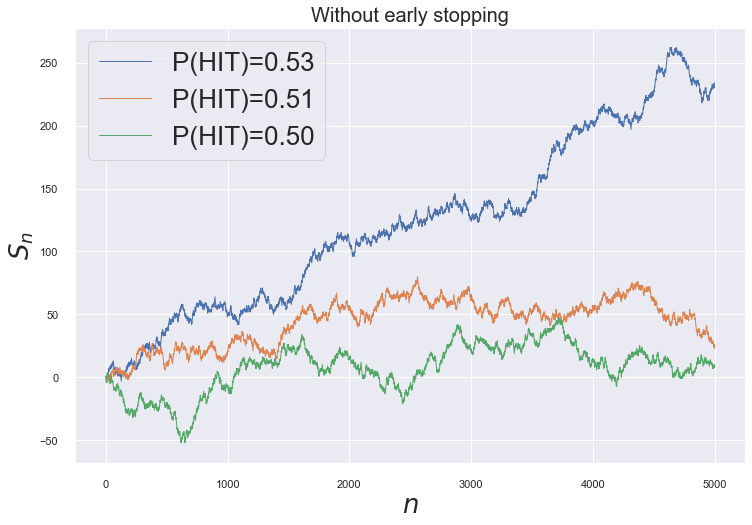

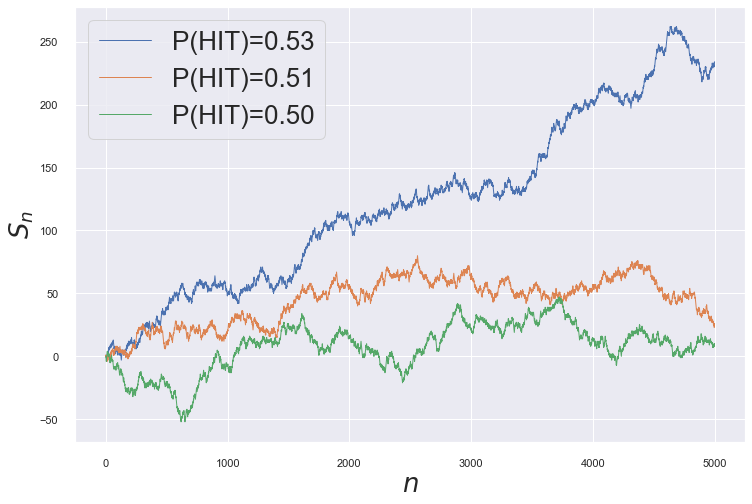

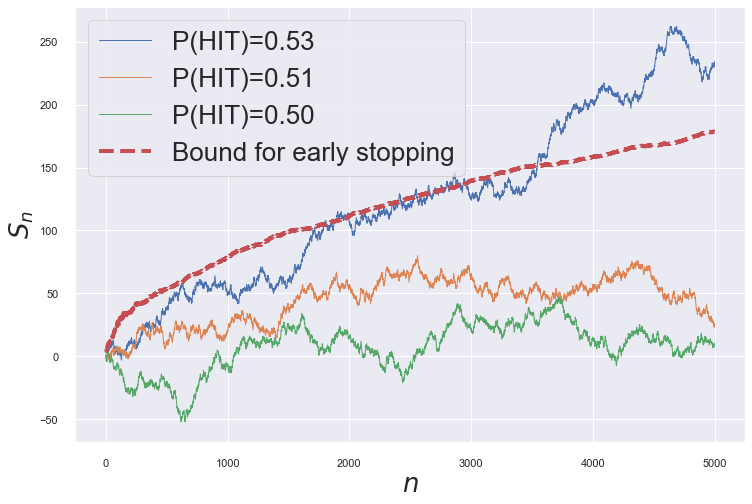

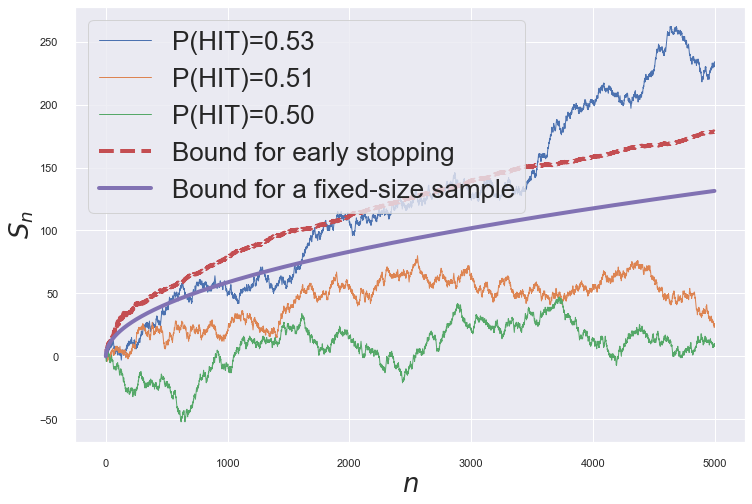

In [5]:
backup = [None] * 3

K = 5000
N = 1
fig1, ax1 = plt.subplots(figsize=(12, 8))


# backup = (None, None, None)
x1 = multiple_coins(ax1, N, K, 0.53, "P(HIT)=0.53", backup[0])
x2 = multiple_coins(ax1, N, K, 0.51, "P(HIT)=0.51", backup[1]);
x3 = multiple_coins(ax1, N, K, 0.50, "P(HIT)=0.50", backup[2])

ax1.set_title("Without early stopping", fontsize=20)
ax1.set_xlabel("$n$", fontsize=26)
ax1.set_ylabel("$S_n$", fontsize=26)
ax1.legend(fontsize=26)
fig1.savefig("scan-all.png", dpi=192)

backup = copy((x1, x2, x3))




N = 1
K = 5000
T = 30000
delta = 1.0 / N

fig1, ax1 = plt.subplots(figsize=(12, 8))
fig2, ax2 = plt.subplots(figsize=(12, 8))
fig3, ax3 = plt.subplots(figsize=(12, 8))

'''
trials = 0
while trials <= 10:
    trials += 1
    bias_coin = np.random.binomial(1, bias_p, T) * 2 - 1
    ax.plot(range(T), np.cumsum(bias_coin), label="p=%.3f" % bias_p,
            c="#ff7f0e")
print("Number of trials:", trials)
'''

for ax in [ax1, ax2, ax3]:
    x4 = multiple_coins(ax, N, K, 0.53, "P(HIT)=0.53", x1)
    x5 = multiple_coins(ax, N, K, 0.51, "P(HIT)=0.51", x2);
    x6 = multiple_coins(ax, N, K, 0.50, "P(HIT)=0.50", x3)

# plot_wald(p, ax, both=False)

print("delta = ", delta)
print("const_small = ", np.sqrt(2.0 * np.log(1.0 / delta)))
print("const = ", np.sqrt(2.0 * np.log(1.0 / delta**2)))

LIL_C = 2.0
plot_lil(x1, ax2, delta, False)
plot_lil(x1, ax3, delta, True)
for ax in [ax1, ax2, ax3]:
    # ax.set_title("", fontsize=20)
    ax.set_xlabel("$n$", fontsize=26)
    ax.set_ylabel("$S_n$", fontsize=26)
    ax.legend(fontsize=26)


# fig.savefig("early-stop.png", dpi=192)

/Users/arapat/dev/virtualenv/py3/lib/python3.7/site-packages/ipykernel_launcher.py:31: RuntimeWarning: divide by zero encountered in true_divide


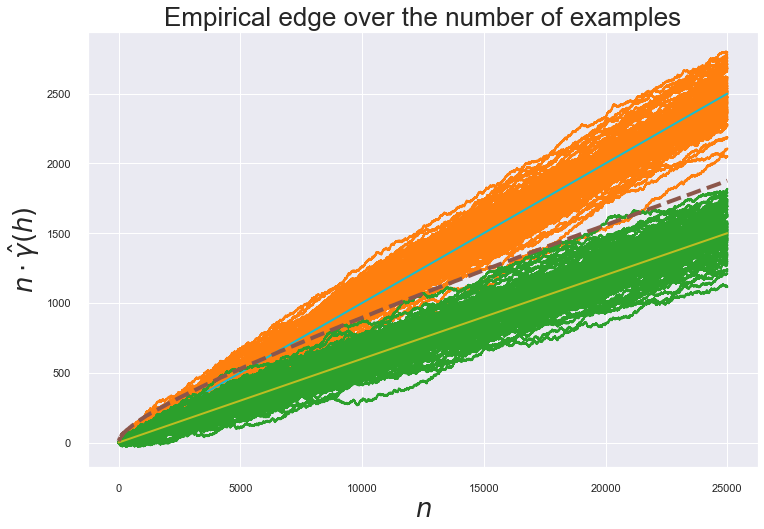

In [6]:
backup = [None] * 3

import matplotlib
matplotlib.rcParams.update({'font.size': 22})

colors = [u'#1f77b4', u'#ff7f0e', u'#2ca02c', u'#d62728', u'#9467bd', u'#8c564b', u'#e377c2', u'#7f7f7f', u'#bcbd22', u'#17becf']

K = 25000
N = 100
fig1, ax1 = plt.subplots(figsize=(12, 8))

# conc = 0.2
# w = np.random.binomial(1, conc, K) * (1.0 / conc)
# x1 = multiple_coins2(ax1, N, K, 0.55, "True edge > 0, non-uniform weights", x=backup[0], w=w, c=colors[0])
x1 = multiple_coins2(ax1, N, K, 0.55, "True edge = 0.05", x=backup[0], c=colors[1])
ax1.plot(np.arange(0, K), np.arange(0, K) * 0.10, c=colors[-1], lw=2)
x2 = multiple_coins2(ax1, N, K, 0.53, "True edge = 0.03", x=backup[1], c=colors[2])
ax1.plot(np.arange(0, K), np.arange(0, K) * 0.06, c=colors[-2], lw=2)
# x3 = multiple_coins2(ax1, N, K, 0.50, "True edge = 0.0", x=backup[2], c=colors[3])
# ax1.plot(np.arange(0, K), np.arange(0, K) * 0.00, c=colors[-3], lw=2)

ax1.set_title("Empirical edge over the number of examples", fontsize=26)
ax1.set_xlabel("$n$", fontsize=26)
ax1.set_ylabel("$n \cdot \hat{\gamma}(h)$", fontsize=26)
ax1.legend(fontsize=22).remove()
fig1.savefig("scan-all.png", dpi=192)

xs = np.random.binomial(1, 0.525, K) * 2 - 1
sum_c = np.cumsum(xs)
sum_csq = np.cumsum(xs**2)
loglogv = 2.0 * np.log(np.log(3.0 * sum_csq / 2 / np.abs(sum_c)))
bound = np.sqrt(2.0 * sum_csq * (loglogv + np.log(2.0 / 0.01)))
indices = np.arange(bound.shape[0])

bound += np.arange(0, K) * 0.05
ax1.plot(indices, bound, ls='--', linewidth=4, label="Bound for early stopping", c=colors[-5])

# backup = copy([x1, x2, x3])

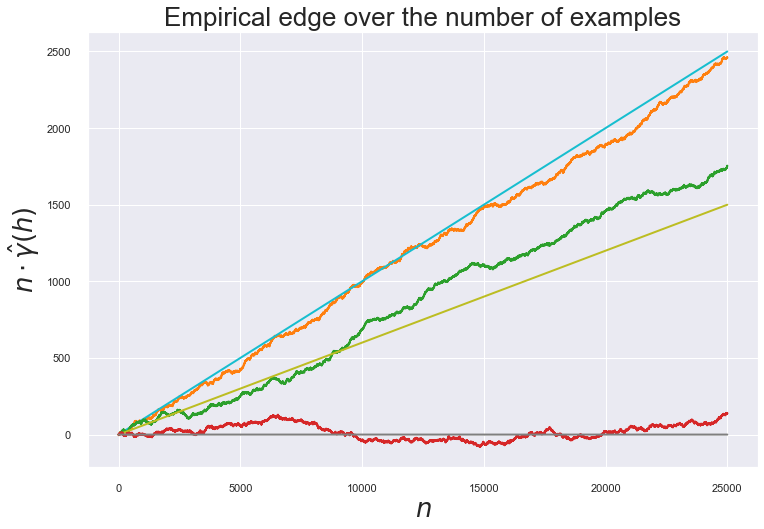

In [350]:
backup = [None] * 3
N = 1

fig1, ax1 = plt.subplots(figsize=(12, 8))

# conc = 0.2
# w = np.random.binomial(1, conc, K) * (1.0 / conc)
# x1 = multiple_coins2(ax1, N, K, 0.55, "True edge > 0, non-uniform weights", x=backup[0], w=w, c=colors[0])
x1 = multiple_coins2(ax1, N, K, 0.55, "True edge = 0.05", x=backup[0], c=colors[1])
ax1.plot(np.arange(0, K), np.arange(0, K) * 0.10, c=colors[-1], lw=2)
x2 = multiple_coins2(ax1, N, K, 0.53, "True edge = 0.03", x=backup[1], c=colors[2])
ax1.plot(np.arange(0, K), np.arange(0, K) * 0.06, c=colors[-2], lw=2)
x3 = multiple_coins2(ax1, N, K, 0.50, "True edge = 0.0", x=backup[2], c=colors[3])
ax1.plot(np.arange(0, K), np.arange(0, K) * 0.00, c=colors[-3], lw=2)

ax1.set_title("Empirical edge over the number of examples", fontsize=26)
ax1.set_xlabel("$n$", fontsize=26)
ax1.set_ylabel("$n \cdot \hat{\gamma}(h)$", fontsize=26)
ax1.legend(fontsize=22).remove()
fig1.savefig("scan-all.png", dpi=192)

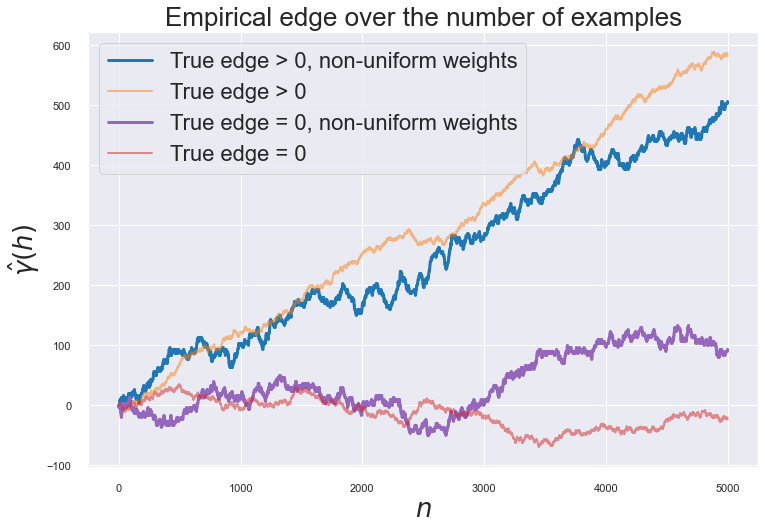

In [9]:
backup = [None] * 3

import matplotlib
matplotlib.rcParams.update({'font.size': 22})

colors = [u'#1f77b4', u'#ff7f0e', u'#2ca02c', u'#d62728', u'#9467bd', u'#8c564b', u'#e377c2', u'#7f7f7f', u'#bcbd22', u'#17becf']

K = 5000
N = 1
fig1, ax1 = plt.subplots(figsize=(12, 8))

conc = 0.3
w = np.random.binomial(1, conc, K) * (1.0 / conc)
x1 = multiple_coins2(ax1, N, K, 0.55, "True edge > 0, non-uniform weights", x=backup[0], w=w, c=colors[0], lw=3)
x1 = multiple_coins2(ax1, N, K, 0.55, "True edge > 0", x=backup[0], c=colors[1], alpha=0.5)
# x2 = multiple_coins2(ax1, N, K, 0.45, "True edge < 0", x=backup[1], c=colors[2])
x3 = multiple_coins2(ax1, N, K, 0.50, "True edge = 0, non-uniform weights", x=backup[2], w=w, c=colors[4], lw=3)
x3 = multiple_coins2(ax1, N, K, 0.50, "True edge = 0", x=backup[2], c=colors[3], alpha=0.5)

ax1.set_title("Empirical edge over the number of examples", fontsize=26)
ax1.set_xlabel("$n$", fontsize=26)
ax1.set_ylabel("$\hat{\gamma}(h)$", fontsize=26)
ax1.legend(fontsize=22)
fig1.savefig("scan-all.png", dpi=192)

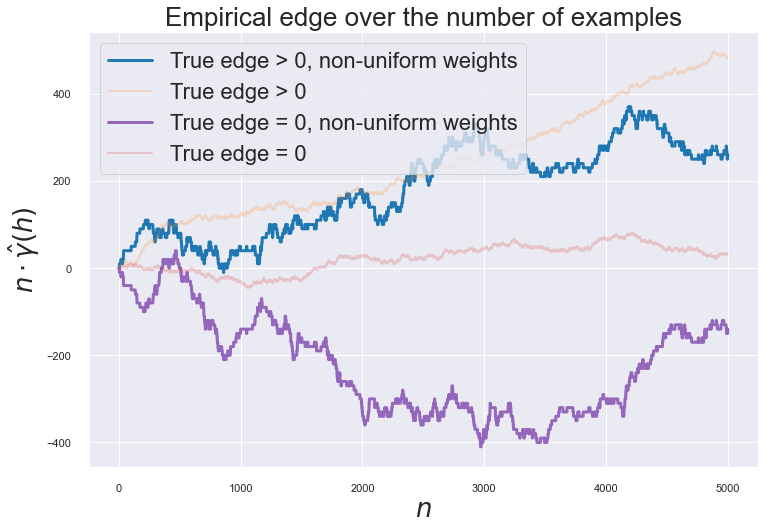

In [10]:
backup = [None] * 3

import matplotlib
matplotlib.rcParams.update({'font.size': 22})

colors = [u'#1f77b4', u'#ff7f0e', u'#2ca02c', u'#d62728', u'#9467bd', u'#8c564b', u'#e377c2', u'#7f7f7f', u'#bcbd22', u'#17becf']

K = 5000
N = 1
fig1, ax1 = plt.subplots(figsize=(12, 8))

conc = 0.1
w = np.random.binomial(1, conc, K) * (1.0 / conc)
x1 = multiple_coins2(ax1, N, K, 0.55, "True edge > 0, non-uniform weights", x=backup[0], w=w, c=colors[0], lw=3)
x1 = multiple_coins2(ax1, N, K, 0.55, "True edge > 0", x=backup[0], c=colors[1], alpha=0.2)
# x2 = multiple_coins2(ax1, N, K, 0.45, "True edge < 0", x=backup[1], c=colors[2])
x3 = multiple_coins2(ax1, N, K, 0.50, "True edge = 0, non-uniform weights", x=backup[2], w=w, c=colors[4], lw=3)
x3 = multiple_coins2(ax1, N, K, 0.50, "True edge = 0", x=backup[2], c=colors[3], alpha=0.2)

ax1.set_title("Empirical edge over the number of examples", fontsize=26)
ax1.set_xlabel("$n$", fontsize=26)
ax1.set_ylabel("$n \cdot \hat{\gamma}(h)$", fontsize=26)
ax1.legend(fontsize=22)
fig1.savefig("scan-all.png", dpi=192)

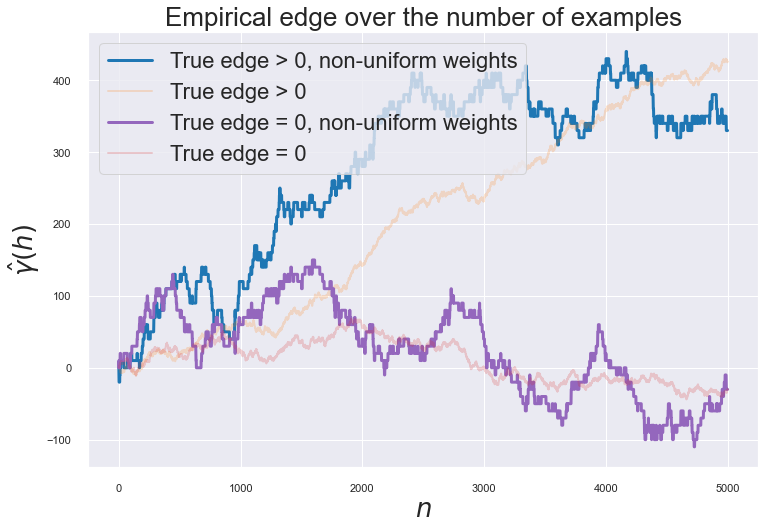

In [11]:
backup = [None] * 3

import matplotlib
matplotlib.rcParams.update({'font.size': 22})

colors = [u'#1f77b4', u'#ff7f0e', u'#2ca02c', u'#d62728', u'#9467bd', u'#8c564b', u'#e377c2', u'#7f7f7f', u'#bcbd22', u'#17becf']

K = 5000
N = 1
fig1, ax1 = plt.subplots(figsize=(12, 8))

conc = 0.1
w = np.random.binomial(1, conc, K) * (1.0 / conc)
x1 = multiple_coins2(ax1, N, K, 0.55, "True edge > 0, non-uniform weights", x=backup[0], w=w, c=colors[0], lw=3)
x1 = multiple_coins2(ax1, N, K, 0.55, "True edge > 0", x=backup[0], c=colors[1], alpha=0.2)
# x2 = multiple_coins2(ax1, N, K, 0.45, "True edge < 0", x=backup[1], c=colors[2])
x3 = multiple_coins2(ax1, N, K, 0.50, "True edge = 0, non-uniform weights", x=backup[2], w=w, c=colors[4], lw=3)
x3 = multiple_coins2(ax1, N, K, 0.50, "True edge = 0", x=backup[2], c=colors[3], alpha=0.2)

ax1.set_title("Empirical edge over the number of examples", fontsize=26)
ax1.set_xlabel("$n$", fontsize=26)
ax1.set_ylabel("$\hat{\gamma}(h)$", fontsize=26)
ax1.legend(fontsize=22)
fig1.savefig("scan-all.png", dpi=192)

0.0


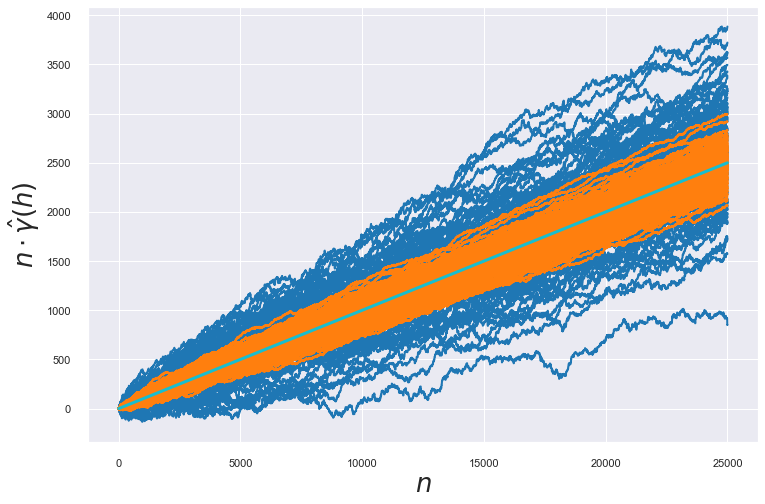

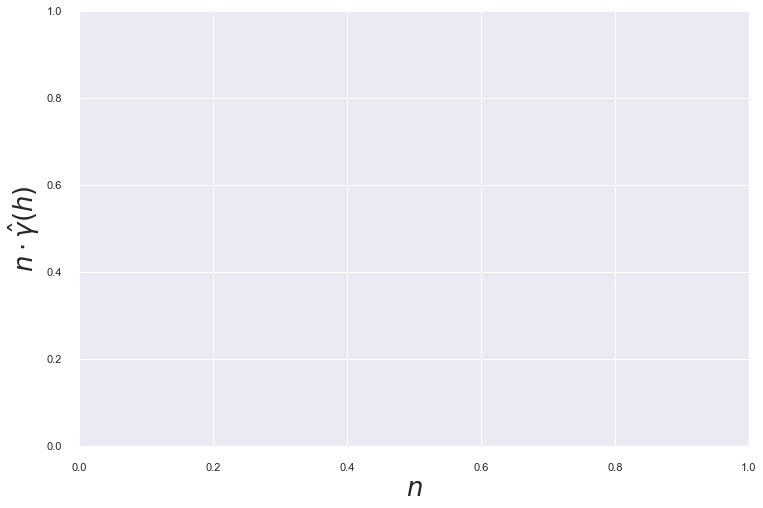

In [12]:
backup = [None] * 3

import scipy.stats as ss
import matplotlib
matplotlib.rcParams.update({'font.size': 22})

colors = [u'#1f77b4', u'#ff7f0e', u'#2ca02c', u'#d62728', u'#9467bd', u'#8c564b', u'#e377c2', u'#7f7f7f', u'#bcbd22', u'#17becf']

K = 25000
N = 1
fig1, ax1 = plt.subplots(figsize=(12, 8))
fig2, ax2 = plt.subplots(figsize=(12, 8))

#######

SCALE = 2.2
NUM_BINS = 10
THETA = 0.1
maxy = 0.0

for i in range(100):
    '''
    while True:
        x = np.arange(0, NUM_BINS)
        xU, xL = x + 0.5, x - 0.5 
        prob = ss.norm.cdf(xU, scale = SCALE) - ss.norm.cdf(xL, scale = SCALE)
        prob = prob / prob.sum() #normalize the probabilities so their sum is 1
        nums = np.random.choice(x, size = K, p = prob)
        count_nums = {}
        for val in nums:
            count_nums[val] = count_nums.get(val, 0) + 1
        w = []
        for val in nums:
            w.append(1.0 / count_nums[val] / len(count_nums))
        w = np.array(w)
        sign = np.random.binomial(1, THETA, size=K)
        # sum(w), np.sum(w)**2/np.sum(w**2), K, np.sum(w * sign)
        neff = np.sum(w)**2/np.sum(w**2)
        if 200 <= neff <= 400: #1000 <= neff <= 1500: # SCALE = 2.6
            break
    '''
    ####

    w1 = np.random.random(size=(int(K*0.1),))
    w2 = np.random.random(size=(int(K*0.9),))
    w = np.concatenate([0.9 * w1 / np.sum(w1), 0.1 * w2 / np.sum(w2)], axis=0)
    np.random.shuffle(w)
    # x1 = multiple_coins3(ax1, N, K, 0.55, "$n_{}$ = {:.2f}".format("{eff}", neff), x=[sign], w=w, c=colors[0])
    # x1 = multiple_coins3(ax1, N, K, 0.55, "True edge > 0, uniform weights", x=[None], c=colors[1], w=1.0/K)

    x1 = multiple_coins3(ax1, N, K, 0.55, "", x=None, w=w, c=colors[0])
    # x1 = multiple_coins3(ax1, N, K, 0.55, "True edge > 0, uniform weights", x=None, c=colors[1], w=1.0/K)
    # maxy = np.max([maxy, np.sum(x1 * w)])

    # x2 = multiple_coins2(ax1, N, K, 0.45, "True edge < 0", x=backup[1], c=colors[2])
    # x3 = multiple_coins2(ax1, N, K, 0.50, "True edge = 0, non-uniform weights", x=backup[2], w=w, c=colors[4], lw=3)
    # x3 = multiple_coins2(ax1, N, K, 0.50, "True edge = 0", x=backup[2], c=colors[3], alpha=0.2)

ax1.plot(np.arange(0, K), np.arange(0, K) * 0.10, c=colors[-1], lw=3)
fig1.savefig("scan-all.png", dpi=192)
x1 = multiple_coins3(ax1, 200, K, 0.55, "True edge > 0, uniform weights", x=None, c=colors[1], w=1.0/K)
ax1.plot(np.arange(0, K), np.arange(0, K) * 0.10, c=colors[-1], lw=3)
for ax in [ax1, ax2]:
    # ax.set_title("Empirical edge over the number of examples", fontsize=26)
    ax.set_xlabel("$n$", fontsize=26)
    ax.set_ylabel("$n \cdot \hat{\gamma}(h)$", fontsize=26)
    # ax.legend(fontsize=22)

fig1.savefig("scan-all2.png", dpi=192)
# fig1.savefig("scan-all.png", dpi=192)

print(maxy)
# ax1.set_ylim(0.0, maxy * K)
# ax2.set_ylim(0.0, maxy * K)

## ax1.plot(np.arange(0, K), np.arange(0, K) * 0.10, c=colors[-4], lw=4)
# ax2.plot(np.arange(0, K), np.arange(0, K) * 0.10, c=colors[-1], lw=4)
# ax1.get_legend().remove()
# ax2.get_legend().remove();